In [1]:
from pylab import *
import numpy as np

# Homework 5: Classic Solutions
This homework we will develop some models for a couple of classic systems -- these practice some basic numerical techniques that will come in handy no matter what you're doing. These systems are often used as examples or initial conditions in more complicated codes, so they're handy to understand!

## Part I: Bonner-Ebert Spheres

In class, we derived the Lane-Emden Equation,

$\frac{1}{\zeta^2} \frac{d}{d\zeta} \zeta^2 \frac{du}{d\zeta} = e^{-u}$

which we can solve in order to get density distributions from a family of solutions for the Bonner-Ebert Sphere, where $\zeta$ and $u$ are variables that encode the radial and density coordinates, respectively.

where $u = -\ln\left(\frac{\rho}{\rho_c}\right)$ and $\zeta = r \left(\frac{c_s^2}{4\pi G\rho_c}\right)^{-1/2}$


### part a
The $u$ and $\zeta$ are coupled, but that behavior is less obvious in their current form, but we can build some intuition for the problem applying what we already know. 

The solutions are encoded in terms of the central concentration: the ratio of $\rho_c/\rho_{0}$. 
If you recall, the Jean's length is also stated in terms of an ambient uniform density, $\rho_0$. 

Solve for $\zeta_J = \zeta(r=r_J)$, then assuming that $u_J = -\ln(\rho_0/\rho_c)$, what is the relationship between $\zeta_J$ and $u_J$?


we have the Jeans length defined as the following from the textbook, $L_{\rm j} = (\frac{\pi}{G \rho_{0}})^{1/2} c_{\rm s}$, to which we can then define $r_{\rm j} = \frac{L_{\rm j}}{2} $, which we plug in as : 

$\zeta_{\rm j} = \frac{L_{\rm j}}{2}  \left(\frac{c_s^2}{4\pi G\rho_c}\right)^{-1/2}$


$\zeta_{\rm j} = \frac{1}{2} (\frac{\pi}{G \rho_{0}})^{1/2} c_{\rm s}  \left(\frac{c_s^2}{4\pi G\rho_c}\right)^{-1/2}$

 which is easier to write as ... 

$\zeta_{\rm j} = \frac{1}{2} (\frac{\pi}{G \rho_{0}})^{1/2} c_{\rm s}  \left(\frac{4\pi G\rho_c}{c_s^2} \right )^{1/2}$

We can cancel and combine some terms and get $\zeta_{\rm j} = \pi (\frac{\rho_{\rm c}}{\rho_{0}})^{1/2} $ 

given that $u_{\rm j} = -\ln\left(\frac{\rho_0}{\rho_c}\right)$, 
$e^{-u_{\rm j}} = \frac{\rho_0}{\rho_{\rm c}} $ or $e^{u_{\rm j}} = \frac{\rho_{\rm c}}{\rho_{0}} $, so we end up with: 

$\zeta_{\rm j} = \pi e^{u_{\rm j} / 2} $


In [88]:
def solve_zeta_J(rho_ratio=1):
    return np.pi * e**(-np.log(1/rho_ratio) / 2)

Text(0, 0.5, '$\\zeta_{j}$')

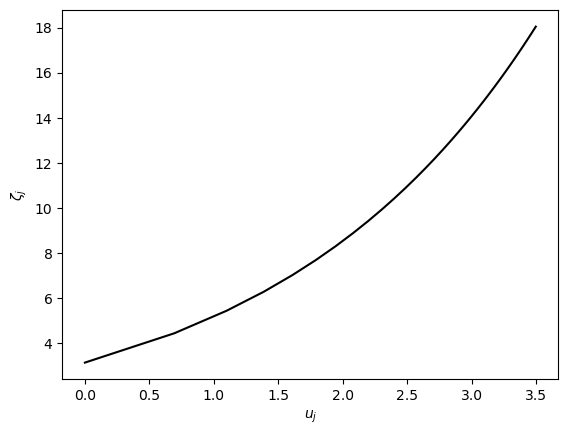

In [89]:
plt.plot(-np.log(1/np.arange(1, 34, 1)), solve_zeta_J(np.arange(1, 34, 1)), c='black')
plt.xlabel(r'$u_{j}$')
plt.ylabel(r'$\zeta_{j}$')

### part b
Taking the derivatives in the Lane-Emden Equation we get:  
$\frac{2}{\zeta} \frac{du}{d\zeta} + \frac{d^2u}{d^2\zeta} = e^{-u}$

Which you may recognize as a second order non-linear differential equation of the form:  
$ y''(x) + \frac{2}{x} y'(x) = e^{-y}$

In order solve a second order ODE, we need to establish our boundary conditions for $y(0), y'(0),$ and $y''(0)$

We know that at $\zeta = 0$, we are at $r=0$, and so that $\rho = \rho_c$, the central density,
so that $u(\zeta=0) = -\ln(1) = 0$, so in this case $y(0)=0$

At $r=0$, $\frac{d\phi}{dr} = 0$, such that $\frac{du}{d\zeta} = 0$, so $y'(0)=0$.

Finally, plugging in to solve for $y''(0) = e^{-y(0)} + \frac{2 y'(0)}{x\rightarrow 0}$, which with some application of L'Hopitals rule, we can get $y''(0) = 1/3$

We can numerically approximate the solution by integrating forward in $x$ in steps of $\Delta x$, knowing that:

$y''(x) = e^{-y} - \frac{2}{x} y'(x)$

and by Taylor expanding around small $\Delta x$ such that the value of y and y' at the next iteration of \Delta x is defined by:

$ y(x + \Delta x) = y(x) + y'(x) \Delta x + y''(x)\Delta x^2 /2$  
$y'(x + \Delta x) = y'(x) + y''(x)\Delta x$  

Define a function called to integrate the Lane Emden equation given some input array of x with the boundary conditions above. 



In [90]:
def integrate_LE(x):
    nsteps = x.size
    y = np.zeros(nsteps)
    yp = np.zeros(nsteps)
    yp2 = np.zeros(nsteps)
    
    yp2[0] = 1/3.
    
    #your function here
    # integrate outwards step by step
    # (logarithmic steps)
    for i in np.arange(1,nsteps):
        # solve for delta x 
        dx = x[i] - x[i-1]
        # update y at x + dx aka i - 1 + 1 
        y[i] = y[i - 1] + yp[i - 1] * dx + yp2[i - 1] * dx**2 / 2
        # update yp at x + dx aka i - 1 + 1 
        yp[i] = yp[i - 1] + yp2[i - 1] * dx 
        # finally update yp2 via the expression ...
        yp2[i] = np.e**(-y[i]) - (2 / x[i]) * yp[i]
    return (y, yp)

(If you're getting really stuck at this point, recall that the textbook has [online resources](https://interstellarmedium.github.io/) that show example code behind the figures..) 

Now we're going to define the inputs through the parameters, so first define the amount of central concentration:
$\rho_c/\rho_0 = 14$ for this fiducial case.
and then set up the array in x going to $\zeta_{\max} = \zeta_J$. (I recommend logarithmically spaced points)

Use your integrator function to calculate $y(x)$ ... otherwise known as $u(\zeta)$. Then use the solution to plot 
$\rho/\rho_c$ vs. $\zeta/\zeta_J$

Given, $u = -\ln\left(\frac{\rho}{\rho_c}\right)$, $e^{-u} = \frac{\rho}{\rho_c}$

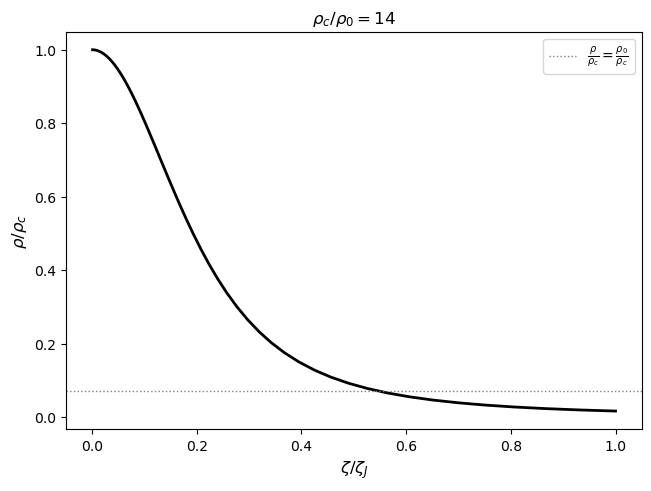

In [91]:
N = 100
rho_ratio = 14.

zeta_J = solve_zeta_J(rho_ratio) # scaling factor
zeta = np.logspace(-2, np.log10(zeta_J), N)

u,up = integrate_LE(zeta)
rho_rhoc = e**(-u)
f,ax = subplots(1,constrained_layout=True, dpi=100)

ax.plot(zeta / zeta_J, rho_rhoc,lw=2,color='black')
ax.set_xlabel(r'$\zeta/\zeta_J$',fontsize=12)
ax.set_ylabel(r'$\rho/\rho_c$',fontsize=12)
ax.set_title(r'$\rho_c/\rho_0 = 14$')
ax.axhline(1/rho_ratio, ls='dotted',lw=1, color='gray', label=r'$\frac{\rho}{\rho_c} = \frac{\rho_0}{\rho_c}$')
plt.legend()

What value should $\rho/\rho_c$ have at small $\zeta$? As $\zeta \rightarrow \zeta_J$?

$\zeta \rightarrow 0, \rho / \rho_c \rightarrow  1$, while $\zeta \rightarrow \zeta_j , \rho / \rho_c \rightarrow  0$

### part c
Up until this point, we are still using non-physical units, without being particularly anchored to realistic scales.
We want to adjust our method up until this point to rescale. Define a function to calculate $r_J$ as a function of ambient density and temperature and re-scale the radial coordinate $\zeta$ in terms of $r_J$ and the central concentration ratio $\rho_c/\rho_0$ to get its value in parsecs. 
use $T_0 = 10 K$ and $\rho_0 = 2.3 m_H \times 10^4 \mathrm{cm^{-3}}$.

This time, make a plot of $\log \rho/\rho_0$ vs $\log r \ \mathrm{[pc]}$ for a series of central concentrations between 2 and 14 (and some values higher than 14), with a legend for the values of the central concentration. 
Annotate on this plot the value of the jean's length. 


going back to:

$L_{\rm j} = (\frac{\pi}{G \rho_{0}})^{1/2} c_{\rm s}$

We need to solve for $c_{\rm s}$, which we can via the following: $P = n k_{\rm B} T$ , $ P = \rho_0 c_{\rm s}^2 $ , $ n = \rho_0 / m_H$ 

$\rho_0 c_{\rm s}^2 = \frac{\rho_0}{m_{\rm H}} k_{\rm B} T$, rearanged to: $ c_{\rm s}^2 = \frac{ k_{\rm B} T }{m_{\rm H}}$

$L_{\rm j} = (\frac{\pi}{G \rho_{0}})^{1/2} (\frac{ k_{\rm B} T }{m_{\rm H}})^{1/2} = (\frac{\pi k_{\rm B} T }{G \rho_{0} m_{\rm H}})^{1/2}$


let's also come back to here ... 

$\zeta = r \left(\frac{c_s^2}{4\pi G\rho_c}\right)^{-1/2} $  or 

$ r = \zeta \left(\frac{c_s^2}{4\pi G\rho_c}\right)^{1/2} = \zeta \left(\frac{\rho_0 c_s^2}{4\pi G\rho_c \rho_0} \right)^{1/2} = \zeta \left(\frac{P}{4\pi G\rho_c \rho_0} \right)^{1/2} = \zeta \left(\frac{n k_{\rm B} T}{4\pi G\rho_c \rho_0} \right)^{1/2} $

$r = \zeta \left(\frac{\rho_0}{m_{H}} \frac{ k_{\rm B} T}{4\pi G\rho_c \rho_0} \right)^{1/2} = \zeta \left(\frac{ k_{\rm B} T}{4\pi G m_{H} \rho_c } \right)^{1/2} $

remember: $\rho_{\rm ratio} = \frac{\rho_c}{\rho_0}$ so $\frac{\rho}{\rho_0} = \frac{\rho}{\rho_0} \frac{\rho_c}{\rho_c} = \rho_{\rm ratio} \frac{\rho}{\rho_c} $

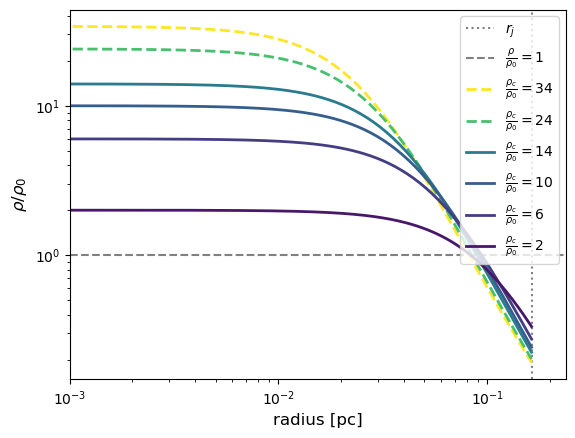

In [94]:
m_H = 1.67e-24 # g 
k_B = 1.3807e-16 # cm^2 g s^-2 K^-1
G = 6.6743e-8 # cgs ...


def r_J(T_0,rho_0):
    # your function here
    return 0.5 * (np.pi * k_B * T_0 / (G * rho_0 * m_H))**(0.5) * 3.24078e-19 # cm to pc 

def zeta_scale(T_0, rho_0, rho_ratio): 
    rho_c = rho_0 * rho_ratio
    
    return (k_B * T_0 / (4 * np.pi * G * m_H * rho_c))**(0.5) * 3.24078e-19 # cm to pc 
    

N = 200
T_0 = 10
rho_0 = 2.3 * m_H * 10**4

axvline(r_J(T_0, rho_0),color='gray', ls='dotted', label=r'$r_{j}$')
axhline(1,color='gray', ls='dashed', label=r'$\frac{\rho}{\rho_0} = 1$')

for rho_ratio in [34,24,14, 10, 6, 2]:
    zeta_J = solve_zeta_J(rho_ratio) # your scaling here
    zeta = np.logspace(-2,np.log10(zeta_J), N)
    u,up = integrate_LE(zeta)
    rho_rhoc = e**(-u)
    rho_rho0 = rho_ratio * rho_rhoc
    r = zeta * zeta_scale(T_0, rho_0, rho_ratio)
    if rho_ratio> 14:
        ls = 'dashed'
    else:
        ls = 'solid'
    loglog(r,rho_rho0, color=cm.viridis(rho_ratio/34),lw=2,ls=ls, label=r'$\frac{\rho_c}{\rho_0} = $' + str(rho_ratio))
xlim(1e-3,)
xlabel('radius [pc]',fontsize=12)
ylabel(r'$\rho/\rho_0$',fontsize=12)

plt.legend()
# plt.plot(10**np.arange(-3, 0, 0.1), (10**np.arange(-3, 0, 0.1))**(-2) * rho_0, ls='--')

14 is the maximum stable central concentration for a bonner-ebert sphere. What happens to the shape of the density distributions for values above critical?

### part d
As above, make a series of plots of $\rho/\rho_0$ vs radius, but this time with the same central concentration, just different values of $T_0$. 

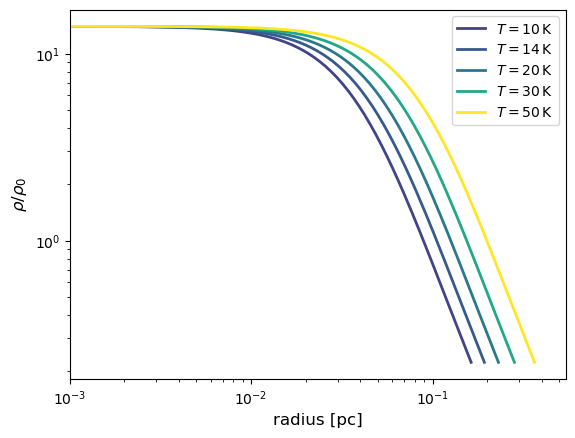

In [32]:
N = 200
T_0 = 10
rho_0 = 2.3*m_H*10**4
rho_ratio = 14.


zeta_J = solve_zeta_J(rho_ratio) # your scaling here
zeta = np.logspace(-2,np.log10(zeta_J),N)
y,yp = integrate_LE(zeta)
rho_rhoc = e**(-y)
rho_rho0 = rho_ratio * rho_rhoc
for T_0 in [10,14,20,30,50]:

    r = zeta * zeta_scale(T_0, rho_0, rho_ratio)
    loglog(r , rho_rho0, color=cm.viridis(T_0/50),lw=2,ls=ls, label=r'$T = $' + str(T_0) + r'$\, {\rm K}$')
xlim(1e-3,)
xlabel('radius [pc]',fontsize=12)
ylabel(r'$\rho/\rho_0$',fontsize=12)

plt.legend()

Explain the behavior of the plots in terms of concepts we've discussed in class, i.e. why does this make sense?

My assumption is that with increasing $T_0$, that leads to an increase $c_s$, thus faster information transfer via hydrodynamics which then propogates futher into the medium. 

## Part II: *Menu* [optional]

Using your model, fit a Bonner-Ebert sphere model (i.e. find the correct central concentration) to the extinction profile of Barnard 68 from Alves et al, 2001
(I've included the file `alves-b68.csv` which has 1 column as radial distance in arcseconds and 1 column as visual extinction) 

In [33]:
import pandas as pd

In [95]:
import pandas as pd

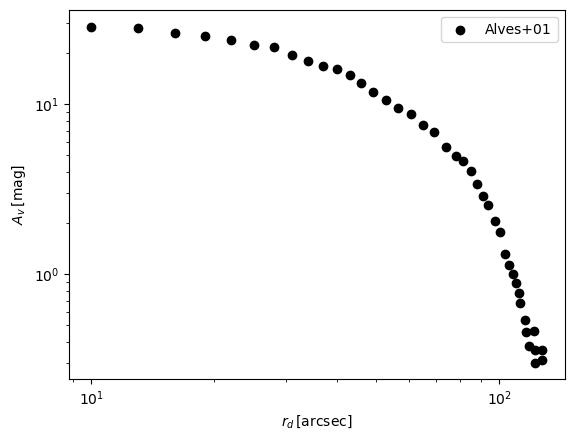

In [96]:

alves_b68 = pd.read_csv('../alves_b68.csv', header=None).to_numpy()
plt.scatter(alves_b68[:, 0], alves_b68[:, 1], label='Alves+01', c='black')
plt.xlabel(r'$r_{d} \, [{\rm arcsec}]$')
plt.ylabel(r'$A_{v} \,  [{\rm mag}]$')
plt.xscale('log')
plt.yscale('log')
plt.legend()



We have to transform into a parsec / mass space ..

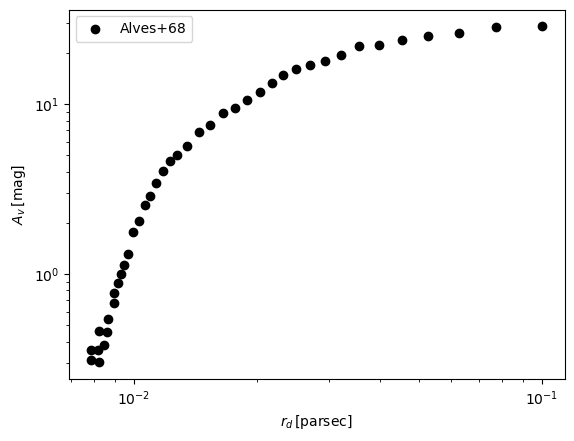

In [57]:
plt.scatter(1/alves_b68[:, 0], alves_b68[:, 1], label='Alves+68', c='black')
plt.xlabel(r'$r_{d} \, [{\rm parsec}]$')
plt.ylabel(r'$A_{v} \,  [{\rm mag}]$')
plt.xscale('log')
plt.yscale('log')
plt.legend()



In [119]:
# from wikipedia 

def A_V_to_nH(A_V): 
    return 1.8e21 * A_V # cm^-2

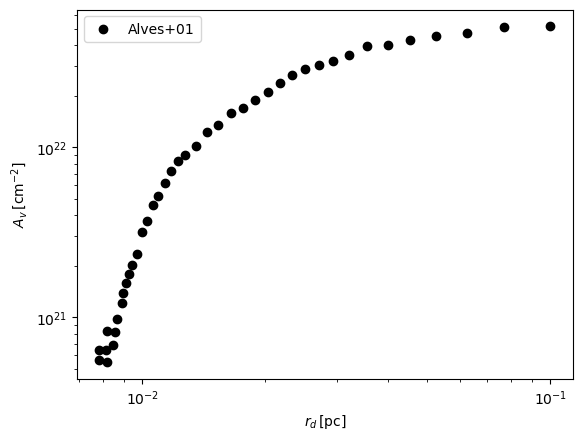

In [120]:
plt.scatter(1/alves_b68[:, 0], A_V_to_nH(alves_b68[:, 1]), label='Alves+01', c='black')
plt.xlabel(r'$r_{d} \, [{\rm pc}]$')
plt.ylabel(r'$A_{v} \, [{\rm cm}^{-2}]$')
plt.xscale('log')
plt.yscale('log')
plt.legend()


which looks like a cumulative mass distribution function ... 

In [121]:
r_arr = 1/alves_b68[:, 0]

$ c_{\rm s}^2 = \frac{ k_{\rm B} T }{m_{\rm H}}$

In [122]:
def rho_r(r): 
    return (k_B * 10 / m_H) / (2*np.pi * G) * 1 / (r * 3.24078e19)

In [123]:
rho_r(r_arr) 

array([0.00060771, 0.00078991, 0.00097371, 0.00115857, 0.0013385 ,
       0.00152377, 0.00170931, 0.00188941, 0.00207011, 0.00224813,
       0.00243427, 0.00262034, 0.00279581, 0.00299183, 0.00321578,
       0.00344406, 0.00368951, 0.00396725, 0.00421081, 0.00450483,
       0.00476899, 0.00497034, 0.00517528, 0.00536153, 0.00555448,
       0.00572056, 0.00592643, 0.00610364, 0.00628086, 0.00644029,
       0.00656051, 0.00667331, 0.00679995, 0.00682672, 0.00709326,
       0.00703084, 0.00719853, 0.00745027, 0.00743322, 0.00741377,
       0.00774877, 0.00774877])